# Sentiment Analysis

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves the extraction and analysis of subjective information from text data. It aims to determine the sentiment or emotional tone expressed in a piece of text, such as positive, negative, or neutral.

The primary goal of sentiment analysis is to understand and quantify the subjective opinions, attitudes, and emotions expressed by individuals or entities in text data. This can be done at various levels, including document-level sentiment analysis, sentence-level sentiment analysis, or aspect-level sentiment analysis.

The dataset used in this case is Twitter US Airline Sentiment, dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

Problem: 
1. What trend distribution of airline sentiments and distribution of negative reasons, impact on the business.
2. Create text classification for future analysis.

# Import Library

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [48]:
# pip install tensorflow
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn

     ------------------------------------ 235.6/235.6 kB 655.2 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [4]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import pad_sequences

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Extract and Load the dataset

In [6]:
# reading the dataset
df = pd.read_csv("Tweets.csv")
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [8]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

# Exploration data analysis

at this stage,we want to answer the distribution of sentiments, distribution of negative reasons, and which airlines had most negative and positive lebels

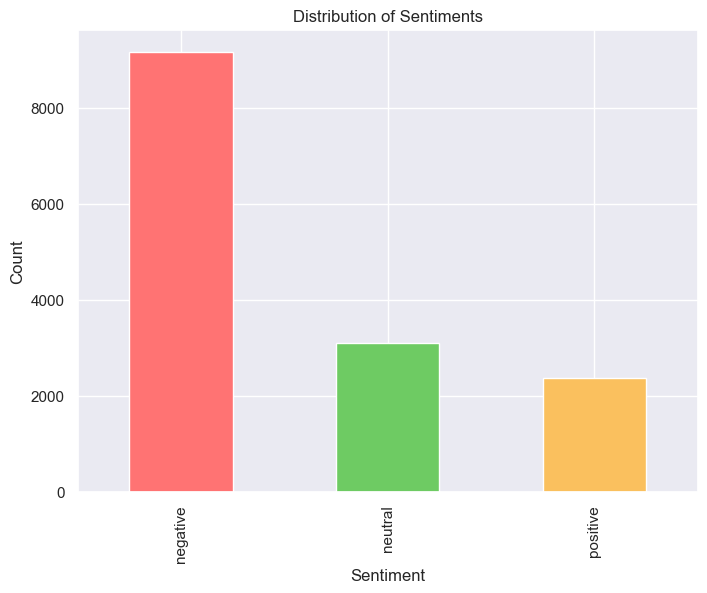

In [9]:
# Count the occurrences of each sentiment
sentiment_counts = df['airline_sentiment'].value_counts()

# Plot the distribution of sentiments
colors = ['#FF7373', '#6ECB63', '#FAC05E']
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

The given data represents sentiment labels associated with a collection of tweets. The dataset exhibits a significant class imbalance, with the majority class being negative sentiment, followed by neutral and positive sentiment. Let's provide a more detailed description:

- Negative: The dataset contains 9,178 instances (approximately 61.5% of the total data) labeled as negative sentiment. These tweets likely express dissatisfaction, criticism, or negative opinions regarding a particular topic, such as an airline. The large number of negative tweets indicates that there is a substantial presence of negative sentiment in the dataset.

- Neutral: There are 3,099 instances (approximately 20.7% of the total data) labeled as neutral sentiment. Tweets in this category generally lack strong positive or negative emotions. They may contain factual information, general statements, or opinions without significant emotional tone. However, it is worth noting that the number of neutral tweets is significantly lower than negative tweets, further emphasizing the class imbalance.

- Positive: The dataset includes 2,363 instances (approximately 15.8% of the total data) labeled as positive sentiment. These tweets express positive emotions, satisfaction, or praise towards a specific topic, such as an airline or a related experience. Similar to the neutral class, the number of positive tweets is substantially lower than negative sentiment tweets.

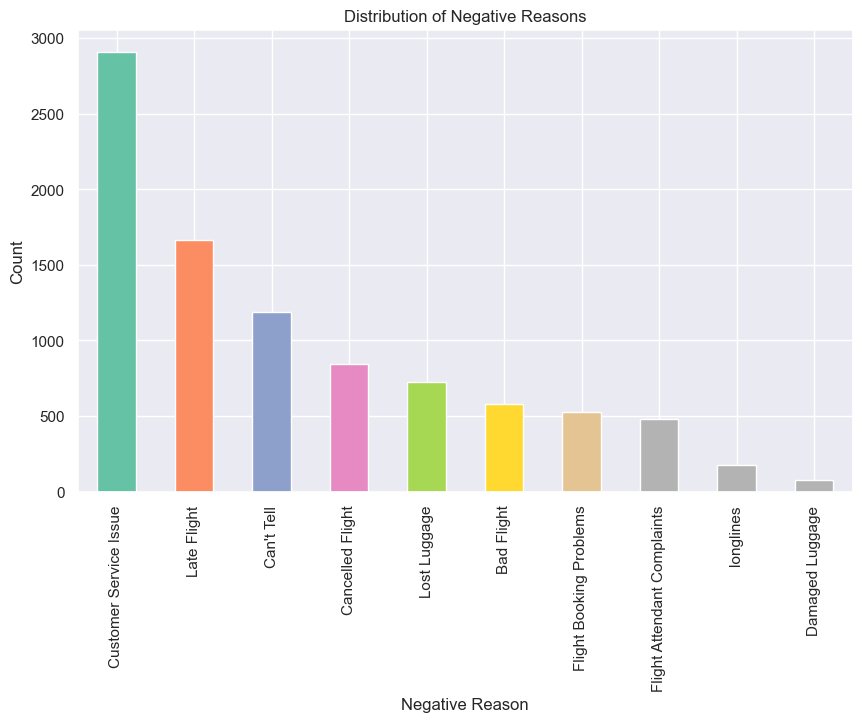

In [65]:
# Filter out rows with negative reasons
negative_reasons = df['negativereason'].dropna()

# Count the occurrences of each negative reason
reason_counts = negative_reasons.value_counts()

# Plot the distribution of negative reasons
colors2 = plt.cm.Set2(range(len(reason_counts)))
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color=colors2)
plt.title('Distribution of Negative Reasons')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()

The distribution of US airline sentiment categories is as follows:

- Customer Service Issue: 29.1% of the total data. Improving customer service interactions and addressing customer concerns should be a priority for the airline.

- Late Flight: 16.6% of the total data. Addressing flight punctuality and minimizing delays is crucial for improving customer satisfaction.

- Can't Tell: 11.9% of the total data. Further analysis is needed to gain insights from this category of ambiguous or indeterminate tweets.

- Cancelled Flight: 8.5% of the total data. Addressing flight cancellations and minimizing disruptions is essential for enhancing customer satisfaction.

- Lost Luggage: 7.2% of the total data. Improving baggage handling processes and ensuring timely delivery is important for customer satisfaction.

- Bad Flight: 5.8% of the total data. Enhancing the overall flight experience and addressing in-flight issues promptly can improve customer satisfaction.

- Flight Booking Problems: 5.3% of the total data. Streamlining the booking process and addressing customer concerns can enhance the customer experience.

- Flight Attendant Complaints: 4.8% of the total data. Ensuring professional behavior and providing excellent service contributes to customer satisfaction.

- Longlines: 1.8% of the total data. Minimizing waiting times and providing efficient assistance can improve the customer experience.

- Damaged Luggage: 0.7% of the total data. Implementing proper handling procedures and resolving luggage issues promptly can enhance customer satisfaction.

Understanding these sentiment categories can help airlines identify areas for improvement. By addressing customer service issues, flight punctuality, baggage handling, and other key concerns, airlines can enhance customer satisfaction, build brand reputation, and foster long-term customer loyalty.

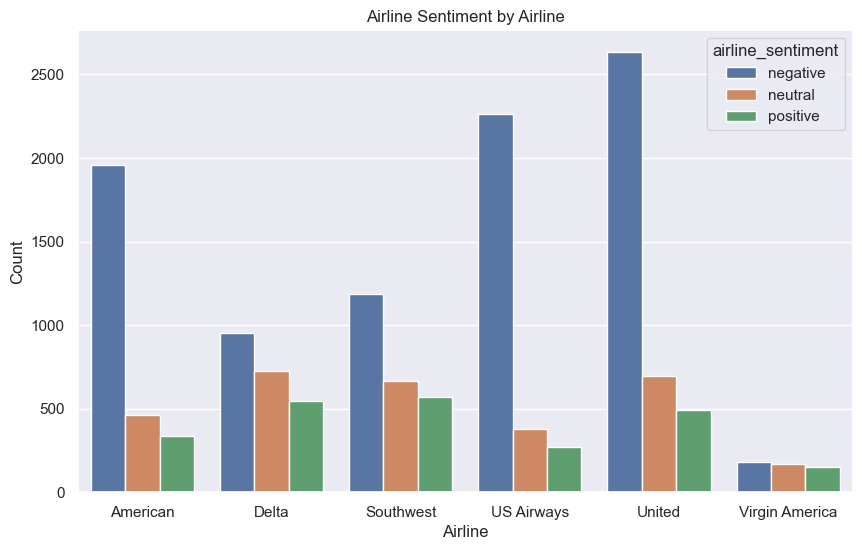

In [69]:
# craete group airline senyiment by airline name
grouped_airline = df.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_airline, x='airline', y='count', hue='airline_sentiment')
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()

In [70]:
grouped_airline 

,airline,airline_sentiment,count
0,American,negative,1960
1,American,neutral,463
2,American,positive,336
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


the most negative tweets and most positive tweets:
- American Airlines: 44.9% negative tweets, 10.6% neutral tweets, and 7.7% positive tweets.
- Delta Airlines: 22.7% negative tweets, 17.2% neutral tweets, and 12.9% positive tweets.
- Southwest Airlines: 29.9% negative tweets, 16.8% neutral tweets, and 14.4% positive tweets.
- US Airways: 45.7% negative tweets, 7.7% neutral tweets, and 5.5% positive tweets.
- United Airlines: 51.3% negative tweets, 13.6% neutral tweets, and 9.6% positive tweets.
- Virgin America: 25.1% negative tweets, 23.7% neutral tweets, and 21.0% positive tweets.

Based on the percentages, United Airlines has the highest percentage of negative tweets, while Virgin America has the highest positive percentage. However, it is important to note that the sentiment distribution may vary across airlines due to factors such as customer base, service quality, and overall reputation.

Impact on the airlines overview:

The data reveals that all airlines have a significant number of negative tweets, with American Airlines, US Airways, and United Airlines having the highest percentages. This indicates potential areas for improvement in customer experiences and services across the industry. Negative sentiments can impact the overall perception of an airline's brand and affect customer satisfaction and loyalty. It is crucial for airlines to address these concerns by focusing on enhancing customer service interactions, flight punctuality, baggage handling processes, and resolving customer issues promptly. By actively working towards reducing negative sentiments, airlines can improve their brand reputation, foster positive customer experiences, and ultimately increase customer satisfaction and loyalty.

While negative sentiments are prominent, positive tweets are also present across all airlines. Enhancing positive experiences and customer satisfaction can further contribute to building a strong brand image and customer loyalty. Airlines can achieve this by recognizing and acknowledging positive feedback, delivering exceptional service, and consistently meeting or exceeding customer expectations.

Overall, by addressing negative sentiments and promoting positive experiences, airlines can positively impact their overview, customer perception, and long-term business success.

In [7]:
data = df[['tweet_id', 'airline_sentiment','airline','text']]
data.head(3)

,tweet_id,airline_sentiment,airline,text
0,570306133677760513,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14640 non-null  int64 
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
 3   text               14640 non-null  object
dtypes: int64(1), object(3)
memory usage: 457.6+ KB


# Handling imbalanced data

In [9]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

as we can see that the label is imbalance, it's need to be balanced in order to model can learn in fair

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
features = data.drop('airline_sentiment', axis=1)
target = data['airline_sentiment']

# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
features_balanced, target_balanced = undersampler.fit_resample(features, target)

print(target_balanced.value_counts())

neutral     3099
negative    2363
positive    2363
Name: airline_sentiment, dtype: int64


now, the data should be balanced, eventhough neatral got more data than other two labels

In [13]:
# Combine features_balanced and target_balanced into a single DataFrame
balanced_data = pd.concat([features_balanced, target_balanced], axis=1)
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7825 entries, 1151 to 14635
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           7825 non-null   int64 
 1   airline            7825 non-null   object
 2   text               7825 non-null   object
 3   airline_sentiment  7825 non-null   object
dtypes: int64(1), object(3)
memory usage: 305.7+ KB


# Cleaning data

## Missing value

In [14]:
# Check Null values
total_null = balanced_data['text'].isnull().sum()
print(f'Total null: {total_null}')

Total null: 0


## Text into Numpay

In [15]:
# Change series into numpy array
all_texts = balanced_data['text'].to_numpy()

In [16]:
all_texts

array(['@united gate C 24 IAD. U released passengers to board w/others deplaning .50 peopleOn bridge while next flight  board http://t.co/HfoF33iyhi',
       "@USAirways 1729 connecting in charlotte to houston. Mechanical issue determined while q'd to take off. And we checked our bags.",
       "@united installed and working are not the same. Kicked me out after an hour and wouldn't let me back in. Four wasted hours.",
       ...,
       'Thank you. “@AmericanAir: @jlhalldc Customer Relations will review your concerns and contact you back directly, John.”',
       '@AmericanAir Thanks! He is.',
       '@AmericanAir thank you we got on a different flight to Chicago.'],
      dtype=object)

## Cleaning text from numbers and symbols

In [17]:
# Importing stopwords list
stop_words =  set(stopwords.words('english'))

# Define a function to clean a text
def clean(text):
    # text = text.str(text) for text in text
    # Lowering letters
    text = str(text).lower()
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    word_tokens = word_tokenize(text)    
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)
    
    # Joining words
    text = (' '.join(filtered_sentence))
    return text

In [18]:
# Clean all texts
all_cleaned_texts = np.array([clean(text) for text in all_texts])

## Encoding text 

In [19]:
# Create word-to-number mapping
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cleaned_texts)

In [20]:
# Encode all words into numbers
all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)
all_encoded_texts = np.array(all_encoded_texts)

In [21]:
# Checking the length of the first 5 files
for i in range(5):
    print('Length of file', i, ':', len(all_encoded_texts[i]))

Length of file 0 : 18
Length of file 1 : 10
Length of file 2 : 9
Length of file 3 : 11
Length of file 4 : 12


In [47]:
# Ensure that all files are having the exact same length. 
all_encoded_texts = pad_sequences(all_encoded_texts, maxlen=100)

## Encoding labels

In [48]:
# Calculate total labels
total_labels = len(balanced_data['airline_sentiment'].unique())
print(f'Total labels: {total_labels}')
print(balanced_data['airline_sentiment'].unique())

Total labels: 3
['negative' 'neutral' 'positive']


In [49]:
# Change labels to array format
all_labels = np.array(balanced_data['airline_sentiment'])

In [50]:
# Create a new axis (this is just the shape expected by OneHotEncoder())
all_labels = all_labels[:, np.newaxis]

In [51]:
# Convert labels into one-hot representation
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels)

# Create model

In [52]:
# Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.2, 
                                                    random_state=42, stratify=all_labels)

In [53]:
# Construct the neural network
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=100))
model.add(LSTM(100))
model.add(Dense(total_labels, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/4
98/98 [==============================] - 10s 90ms/step - loss: 0.9716 - accuracy: 0.5243 - val_loss: 0.7522 - val_accuracy: 0.6658
Epoch 2/4
98/98 [==============================] - 12s 118ms/step - loss: 0.5360 - accuracy: 0.7919 - val_loss: 0.6589 - val_accuracy: 0.7323
Epoch 3/4
98/98 [==============================] - 12s 118ms/step - loss: 0.3438 - accuracy: 0.8724 - val_loss: 0.7119 - val_accuracy: 0.7265
Epoch 4/4
98/98 [==============================] - 11s 115ms/step - loss: 0.2344 - accuracy: 0.9174 - val_loss: 0.7943 - val_accuracy: 0.7201


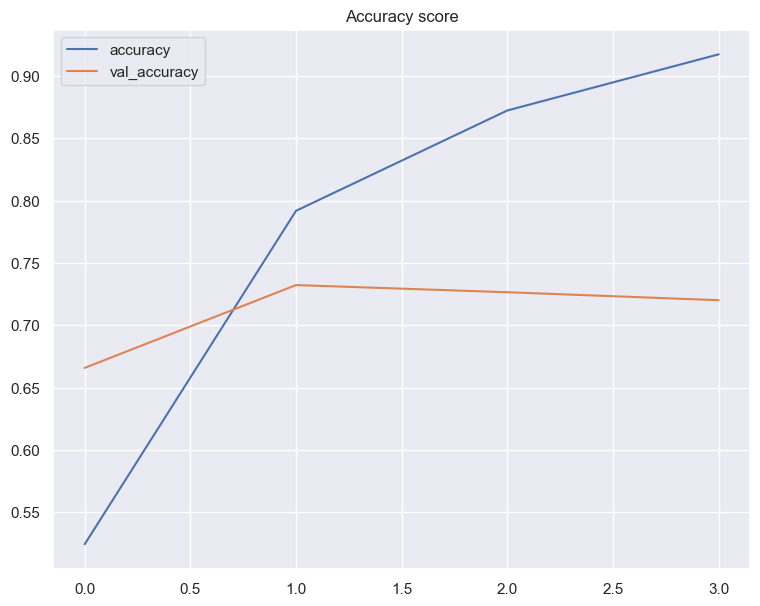

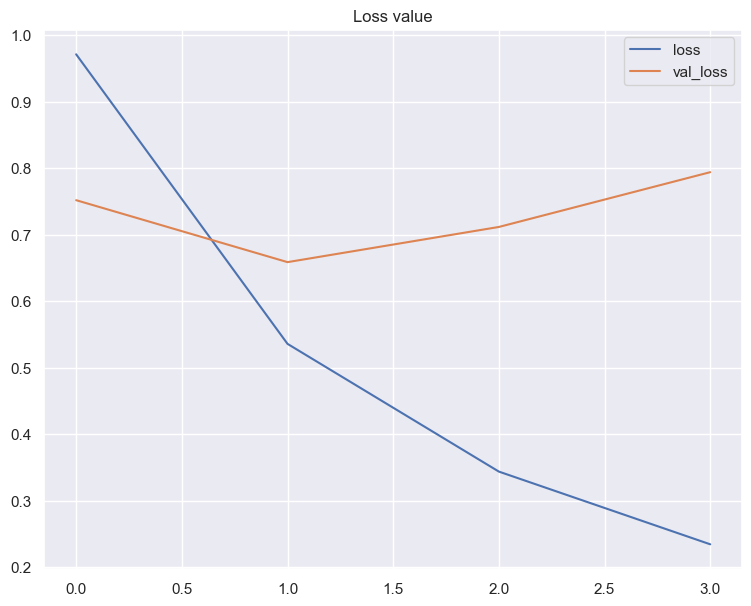

In [55]:
# Display the training process
plt.figure(figsize=(9,7))
plt.title('Accuracy score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(9,7))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [56]:
# Predict test data
predictions = model.predict(X_test)
predictions_evaluate = np.argmax(predictions, axis=1)

49/49 [==============================] - 1s 10ms/step


In [57]:
# Convert y_test (actual label) from one-hot format
y_test_evaluate = np.argmax(y_test, axis=1)

## Classification_report

In [59]:
target_names = [target_name.split('_')[1] for target_name in one_hot_encoder.get_feature_names_out()]
print(classification_report(y_test_evaluate, predictions_evaluate, target_names=target_names))

print('Total Weighted F1 Score:', f1_score(y_test_evaluate, predictions_evaluate, average='weighted'))

              precision    recall  f1-score   support

    negative       0.73      0.72      0.72       472
     neutral       0.71      0.70      0.71       620
    positive       0.73      0.75      0.74       473

    accuracy                           0.72      1565
   macro avg       0.72      0.72      0.72      1565
weighted avg       0.72      0.72      0.72      1565

Total Weighted F1 Score: 0.7200333019704714


The classification report evaluates the performance of a model on a multi-class classification task. The model achieves an overall accuracy of 72%, indicating that it correctly classifies 72% of the instances. The precision, recall, and F1-score for each class vary slightly, with values ranging from 0.70 to 0.75. This suggests that the model demonstrates a reasonable ability to correctly identify positive instances, but there is room for improvement in accurately classifying instances across all classes.

The weighted average F1-score, which takes into account the class distribution, is 0.72. This indicates the overall effectiveness of the model in achieving a balance between precision and recall for the entire dataset.

It is important to consider the specific context of the classification task and the relative importance of precision and recall for the application at hand. Further analysis and improvement efforts may be required to enhance the model's performance, particularly in achieving higher precision and recall values for individual classes.

Overall, the classification report provides insights into the model's performance and highlights areas that can be further optimized to enhance its accuracy and effectiveness in classifying instances.

The model can be improved by taking several actions such as by using hyperparameter tuning, model selection, or increase the training data. 

# Testing the model for new text

In [60]:
# Create a new string 
string = ['@AmericanAir thank you we got on a different flight to Chicago.']

In [61]:
# Clean the new string
cleaned_string = clean(string)

# Encode all words in the string
encoded_string = tokenizer.texts_to_sequences([cleaned_string])

# Add zero padding such that the string will be having the length of 500 words
encoded_string = sequence.pad_sequences(encoded_string, maxlen=500)

In [62]:
# Predict string class
string_predict = model.predict(encoded_string)
print(str(one_hot_encoder.inverse_transform(string_predict).item()))

1/1 [==============================] - 0s 250ms/step
positive
